In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_multiple_experiments_grid(aux_dict: dict):
    n = len(aux_dict)
    n_cols = n
    n_rows = 1

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows), sharey=True)
    axs = axs.flatten()

    for ax, (name, dic_met) in zip(axs, aux_dict.items()):
        df = pd.read_csv(dic_met['output'])
        # metrics = pd.read_csv(dic_met['metrics'])

        df = df[df["in_degree"] > 0]

        f1 = df.query("fit_peak_value > 0 and fit_peak_value <= 10")
        f2 = df.query("fit_peak_value > 10 and fit_peak_value <= 100")
        f3 = df.query("fit_peak_value > 100 and fit_peak_value <= 1000")
        f4 = df.query("fit_peak_value > 1000 and fit_peak_value <= 10000")
        f5 = df.query("fit_peak_value > 10000 and fit_peak_value <= 100000")
        f6 = df.query("fit_peak_value > 100000 and fit_peak_value <= 1000000")

        dfs    = [f1, f2, f3, f4, f5, f6]
        labels = ['0-10', '10-100', '100-1k', '1k-10k', '10k-100k', '100k-1M']
        positions = np.arange(len(dfs)) * 2
        width     = 0.6
        medianprops = dict(color='black', linewidth=2.5)

        for i, df_part in enumerate(dfs):
            x = positions[i]
            agent_vals = df_part.loc[df_part['type']=='agent', 'in_degree']
            seed_vals  = df_part.loc[df_part['type']=='seed',  'in_degree']

            agent_vals = agent_vals[agent_vals > 0]
            seed_vals  = seed_vals[seed_vals > 0]
            agent_vals = np.log10(agent_vals)
            seed_vals  = np.log10(seed_vals)

            ax.boxplot(
                agent_vals,
                positions=[x - width/2],
                widths=width,
                notch=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightblue',  edgecolor='black'),
                medianprops=medianprops
            )

            ax.boxplot(
                seed_vals,
                positions=[x + width/2],
                widths=width,
                notch=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral', edgecolor='black'),
                medianprops=medianprops
            )
        # seed_max_in = str(metrics['seed_indeg_max'].values[0])
        # agent_max_in = str(metrics['agent_indeg_max'].values[0])
        
        # ax.text(
        # 0.97, 0.05,
        # f"Seed in max: {seed_max_in}\nAgent in max: {agent_max_in}",
        # transform=ax.transAxes,
        # fontsize=11,
        # fontweight='bold',
        # verticalalignment='bottom',
        # horizontalalignment='right',
        # bbox=dict(boxstyle="round,pad=0.5", facecolor="#f9f9f9", edgecolor="gray", alpha=0.9),
        # linespacing=1.3   
        # )   

        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=45)
        ax.set_xlabel('Tag2')
        ax.set_ylabel('log10(in_degree)')
        ax.set_title(name)

    for ax in axs[n:]:
        ax.remove()

    legend_elems = [
        Patch(facecolor='lightblue',  edgecolor='black', label='agent'),
        Patch(facecolor='lightcoral', edgecolor='black', label='seed')
    ]
    axs[0].legend(handles=legend_elems, loc='upper left')
    plt.tight_layout()
    plt.show()

In [87]:
def get_indeg_ss(out_aux_path, fit_value):
    df = pd.read_csv(out_aux_path)
    ss_row = df[df["fit_peak_value"] == fit_value]
    return ss_row["in_degree"].values[0]

for fit in [1000000]:
    print(get_indeg_ss("data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_20_years_of_fitness/output/output.aux", fit))

345929


/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1994236111.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(out_aux_path)


/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])


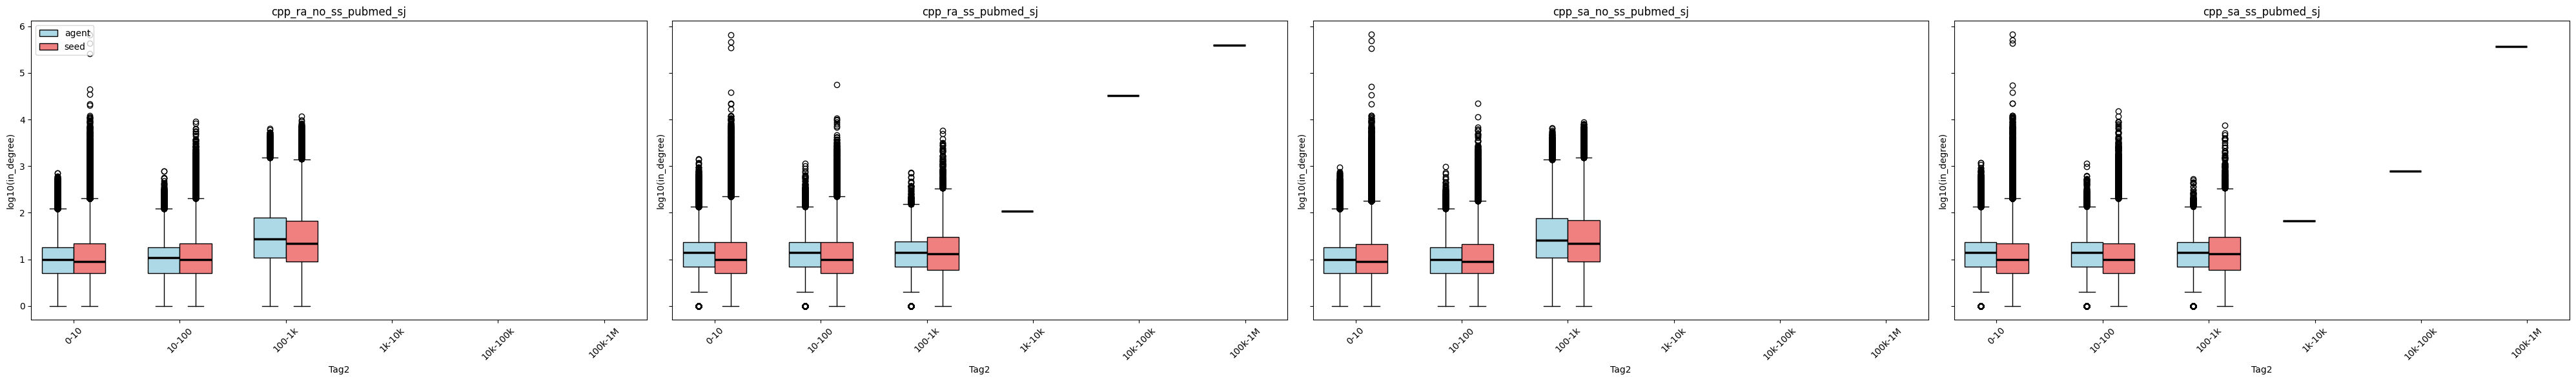

In [69]:
#PUBMED SJ CPP
inputs = {

    'cpp_ra_no_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_18_ecc7_fmf_standard_no_ss_ra_pubmed/output/output.aux', "metrics":'data/output_aux/pubmed_standard_sj/6_18_ecc7_fmf_standard_no_ss_ra_pubmed/experiment_metrics.csv'},
    'cpp_ra_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_18_ecc7_fmf_standard_ss_ra_pubmed/output/output.aux', "metrics":'data/output_aux/pubmed_standard_sj/6_18_ecc7_fmf_standard_ss_ra_pubmed/experiment_metrics.csv'},
    'cpp_sa_no_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_19_ecc7_fmf_standard_no_ss_sa_pubmed/output/output.aux', "metrics":'data/output_aux/pubmed_standard_sj/6_19_ecc7_fmf_standard_no_ss_sa_pubmed/experiment_metrics.csv'},
    'cpp_sa_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_19_ecc7_fmf_standard_ss_sa_pubmed/output/output.aux', "metrics":'data/output_aux/pubmed_standard_sj/6_19_ecc7_fmf_standard_ss_sa_pubmed/experiment_metrics.csv'},
    

}
plot_multiple_experiments_grid(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/284953526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])


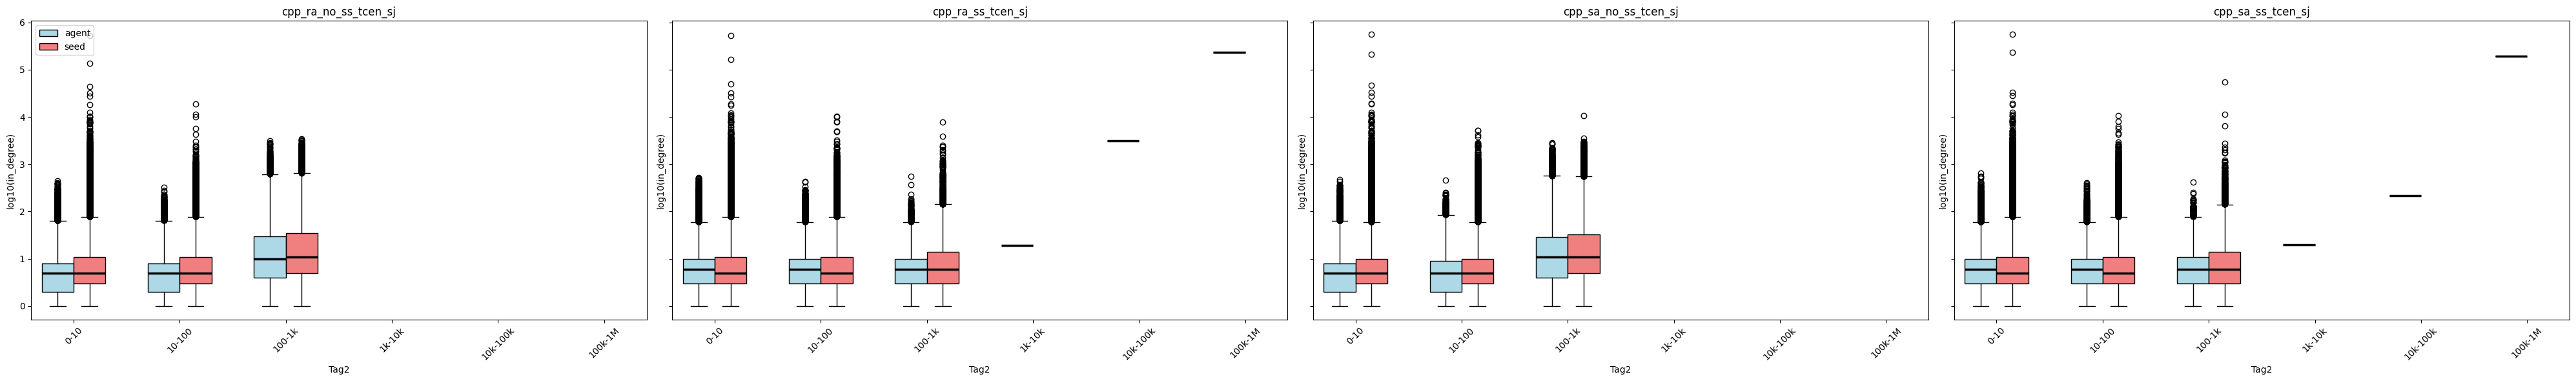

In [70]:
#TCEN SJ CPP
inputs = {

    'cpp_ra_no_ss_tcen_sj': {"output":'data/output_aux/tcen_standard_sj/6_17_ecc7_fmf_standard_no_ss_ra/output/output.aux', "metrics":'data/output_aux/tcen_standard_sj/6_17_ecc7_fmf_standard_no_ss_ra/experiment_metrics.csv',},
    'cpp_ra_ss_tcen_sj': {"output":'data/output_aux/tcen_standard_sj/6_18_fmf_ecc7_standard_ss_ra/output/output.aux', "metrics":'data/output_aux/tcen_standard_sj/6_18_fmf_ecc7_standard_ss_ra/experiment_metrics.csv',},
    'cpp_sa_no_ss_tcen_sj': {"output":'data/output_aux/tcen_standard_sj/6_19_ecc7_fmf_standard_no_ss_sa/output/output.aux', "metrics":'data/output_aux/tcen_standard_sj/6_19_ecc7_fmf_standard_no_ss_sa/experiment_metrics.csv',},
    'cpp_sa_ss_tcen_sj': {"output":'data/output_aux/tcen_standard_sj/6_19_ecc7_fmf_standard_ss_sa/output/output.aux', "metrics":'data/output_aux/tcen_standard_sj/6_19_ecc7_fmf_standard_ss_sa/experiment_metrics.csv',},
}
plot_multiple_experiments_grid(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (14) have mixed t

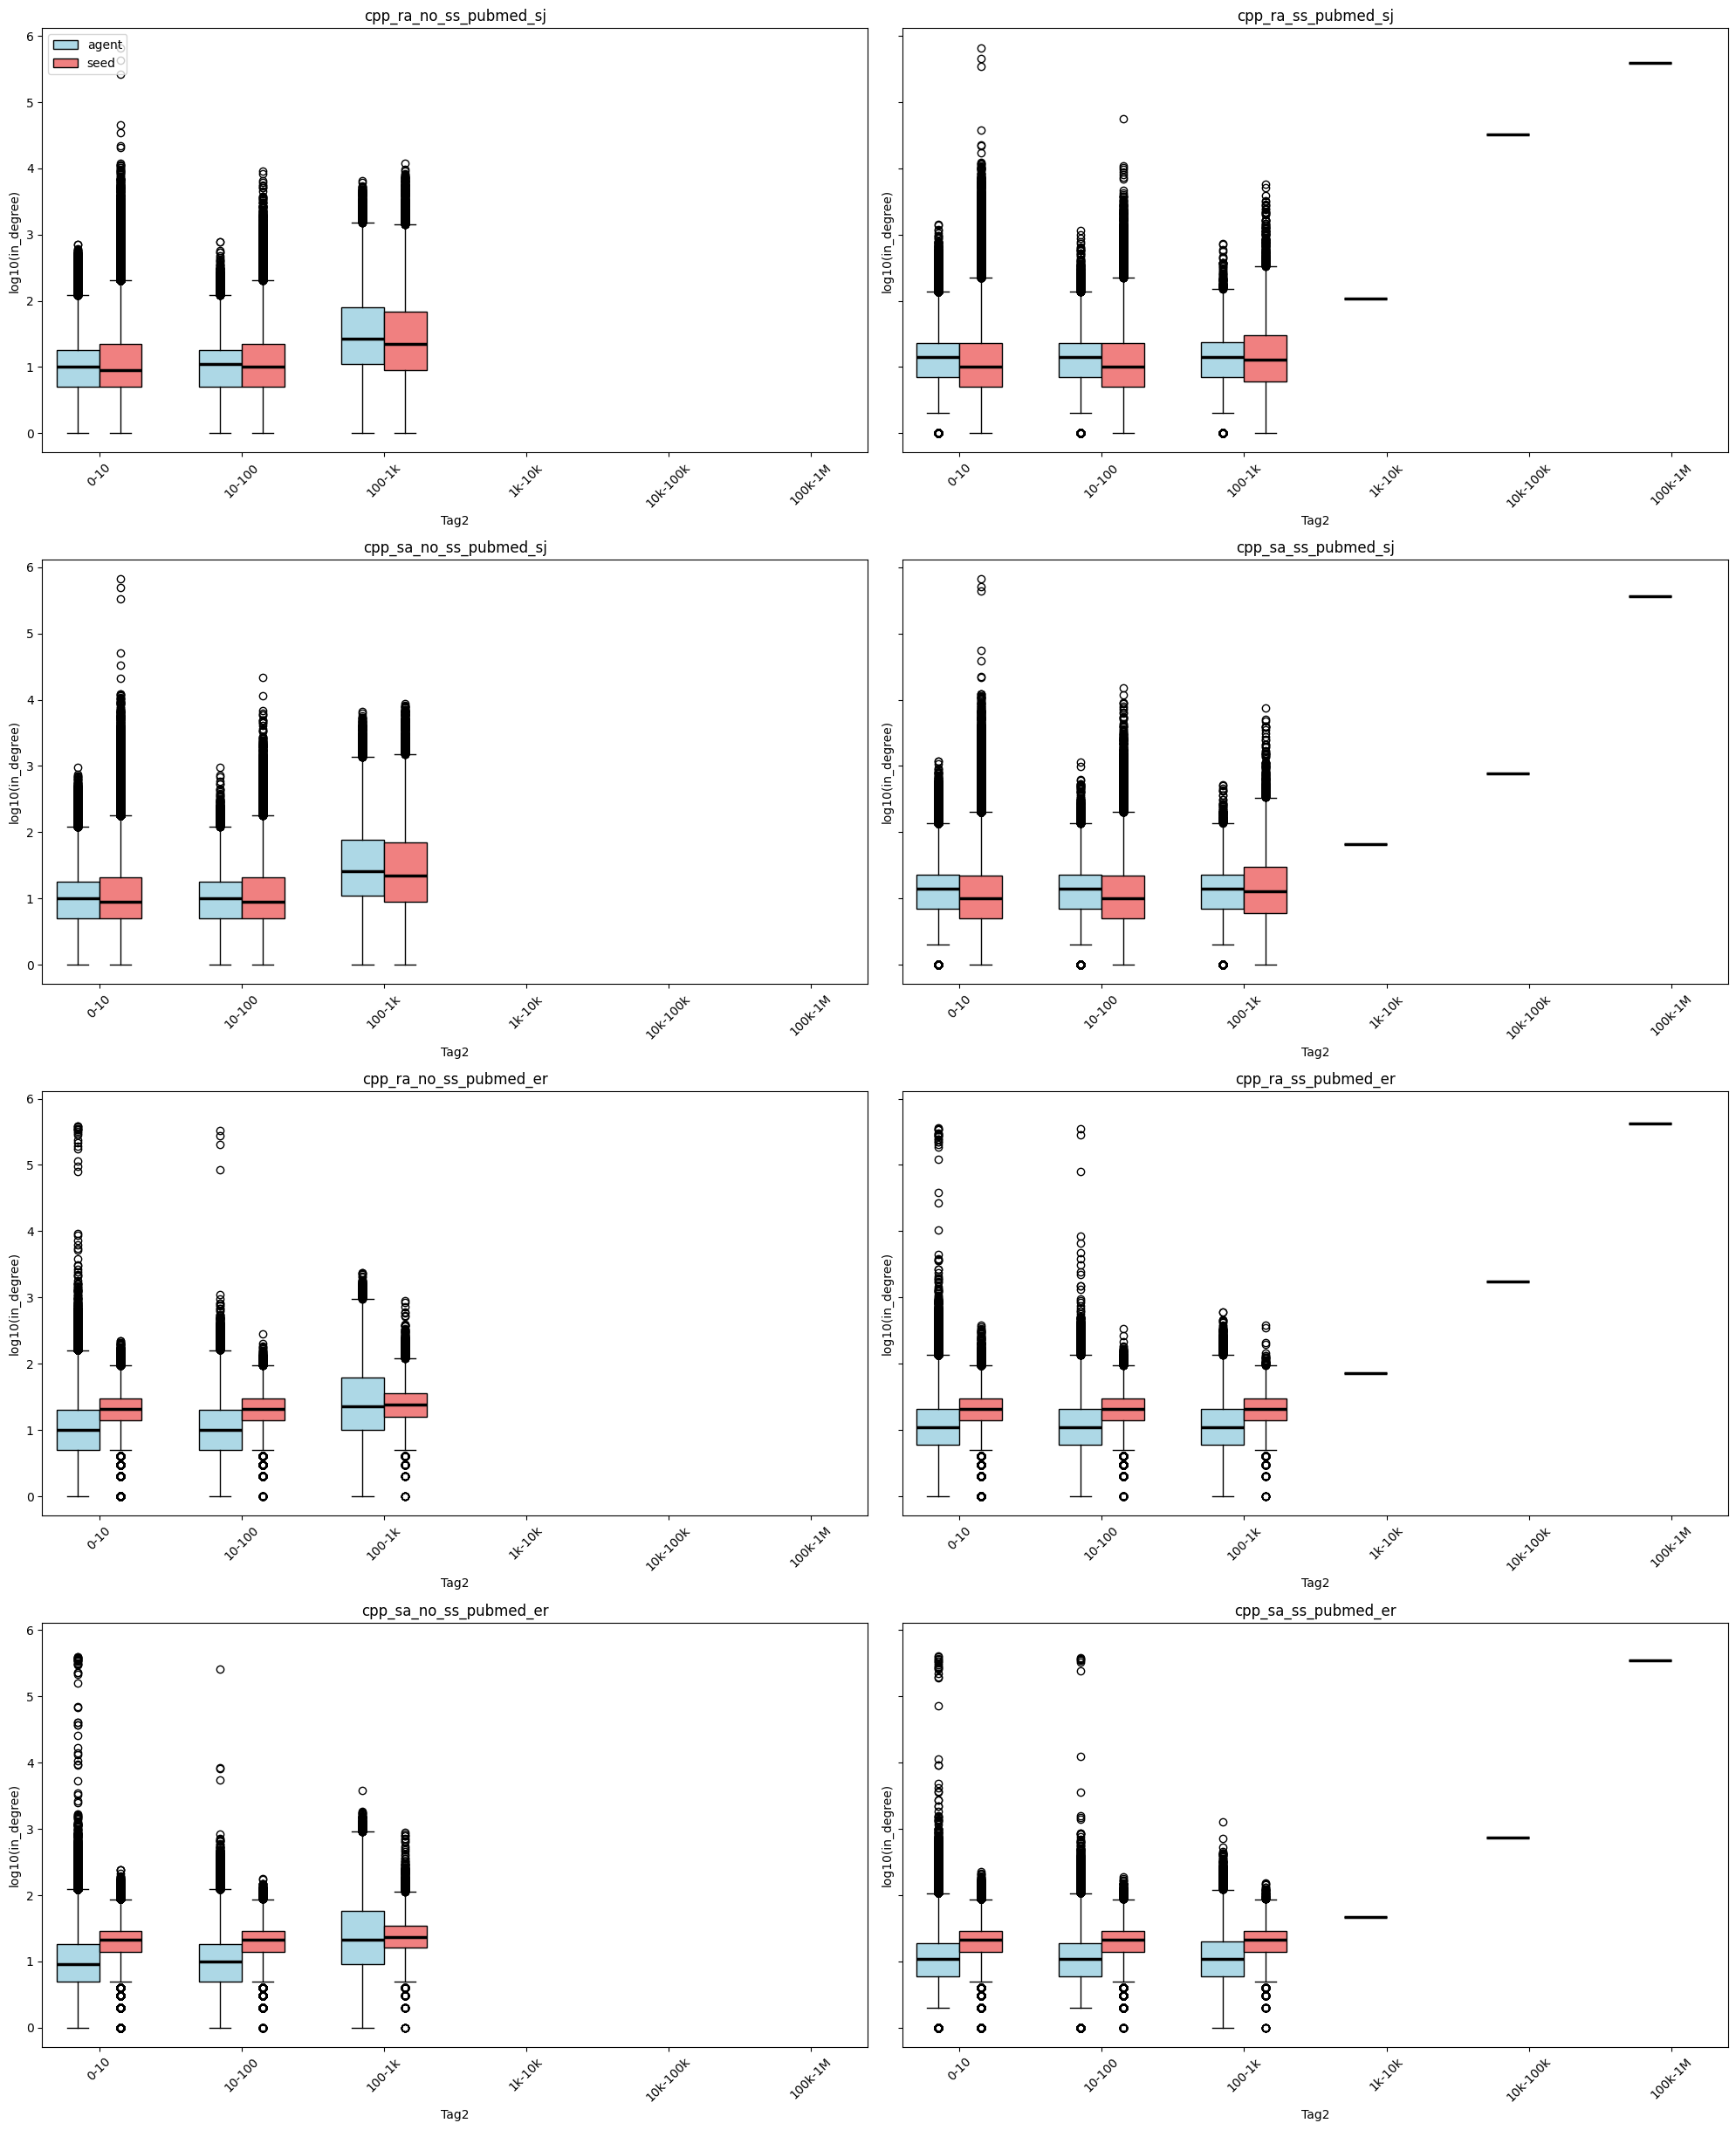

In [ ]:
#PUBMED CPP ALL
inputs = {

    'cpp_ra_no_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_18_ecc7_fmf_standard_no_ss_ra_pubmed/output/output.aux'},
    'cpp_ra_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_18_ecc7_fmf_standard_ss_ra_pubmed/output/output.aux'},
    'cpp_sa_no_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_19_ecc7_fmf_standard_no_ss_sa_pubmed/output/output.aux'},
    'cpp_sa_ss_pubmed_sj': {"output":'data/output_aux/pubmed_standard_sj/6_19_ecc7_fmf_standard_ss_sa_pubmed/output/output.aux'},


    'cpp_ra_no_ss_pubmed_er': {"output": 'data/experiment_metrics/cpp_abm_er/6_24_ecc7_fmf_no_ss_ra_pubmed_er/output/output.aux'},
    'cpp_ra_ss_pubmed_er': {"output": 'data/experiment_metrics/cpp_abm_er/6_24_ecc7_fmf_ss_ra_pubmed_er/output/output.aux'},
    'cpp_sa_no_ss_pubmed_er': {"output": 'data/experiment_metrics/cpp_abm_er/6_24_ecc7_fmf_no_ss_sa_pubmed_er/output/output.aux'},
    'cpp_sa_ss_pubmed_er': {"output": 'data/experiment_metrics/cpp_abm_er/6_24_ecc7_fmf_ss_sa_pubmed_er/output/output.aux'},
}
plot_multiple_experiments_grid(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/269720171.py:15: DtypeWarning: Columns (2) have mixed types.

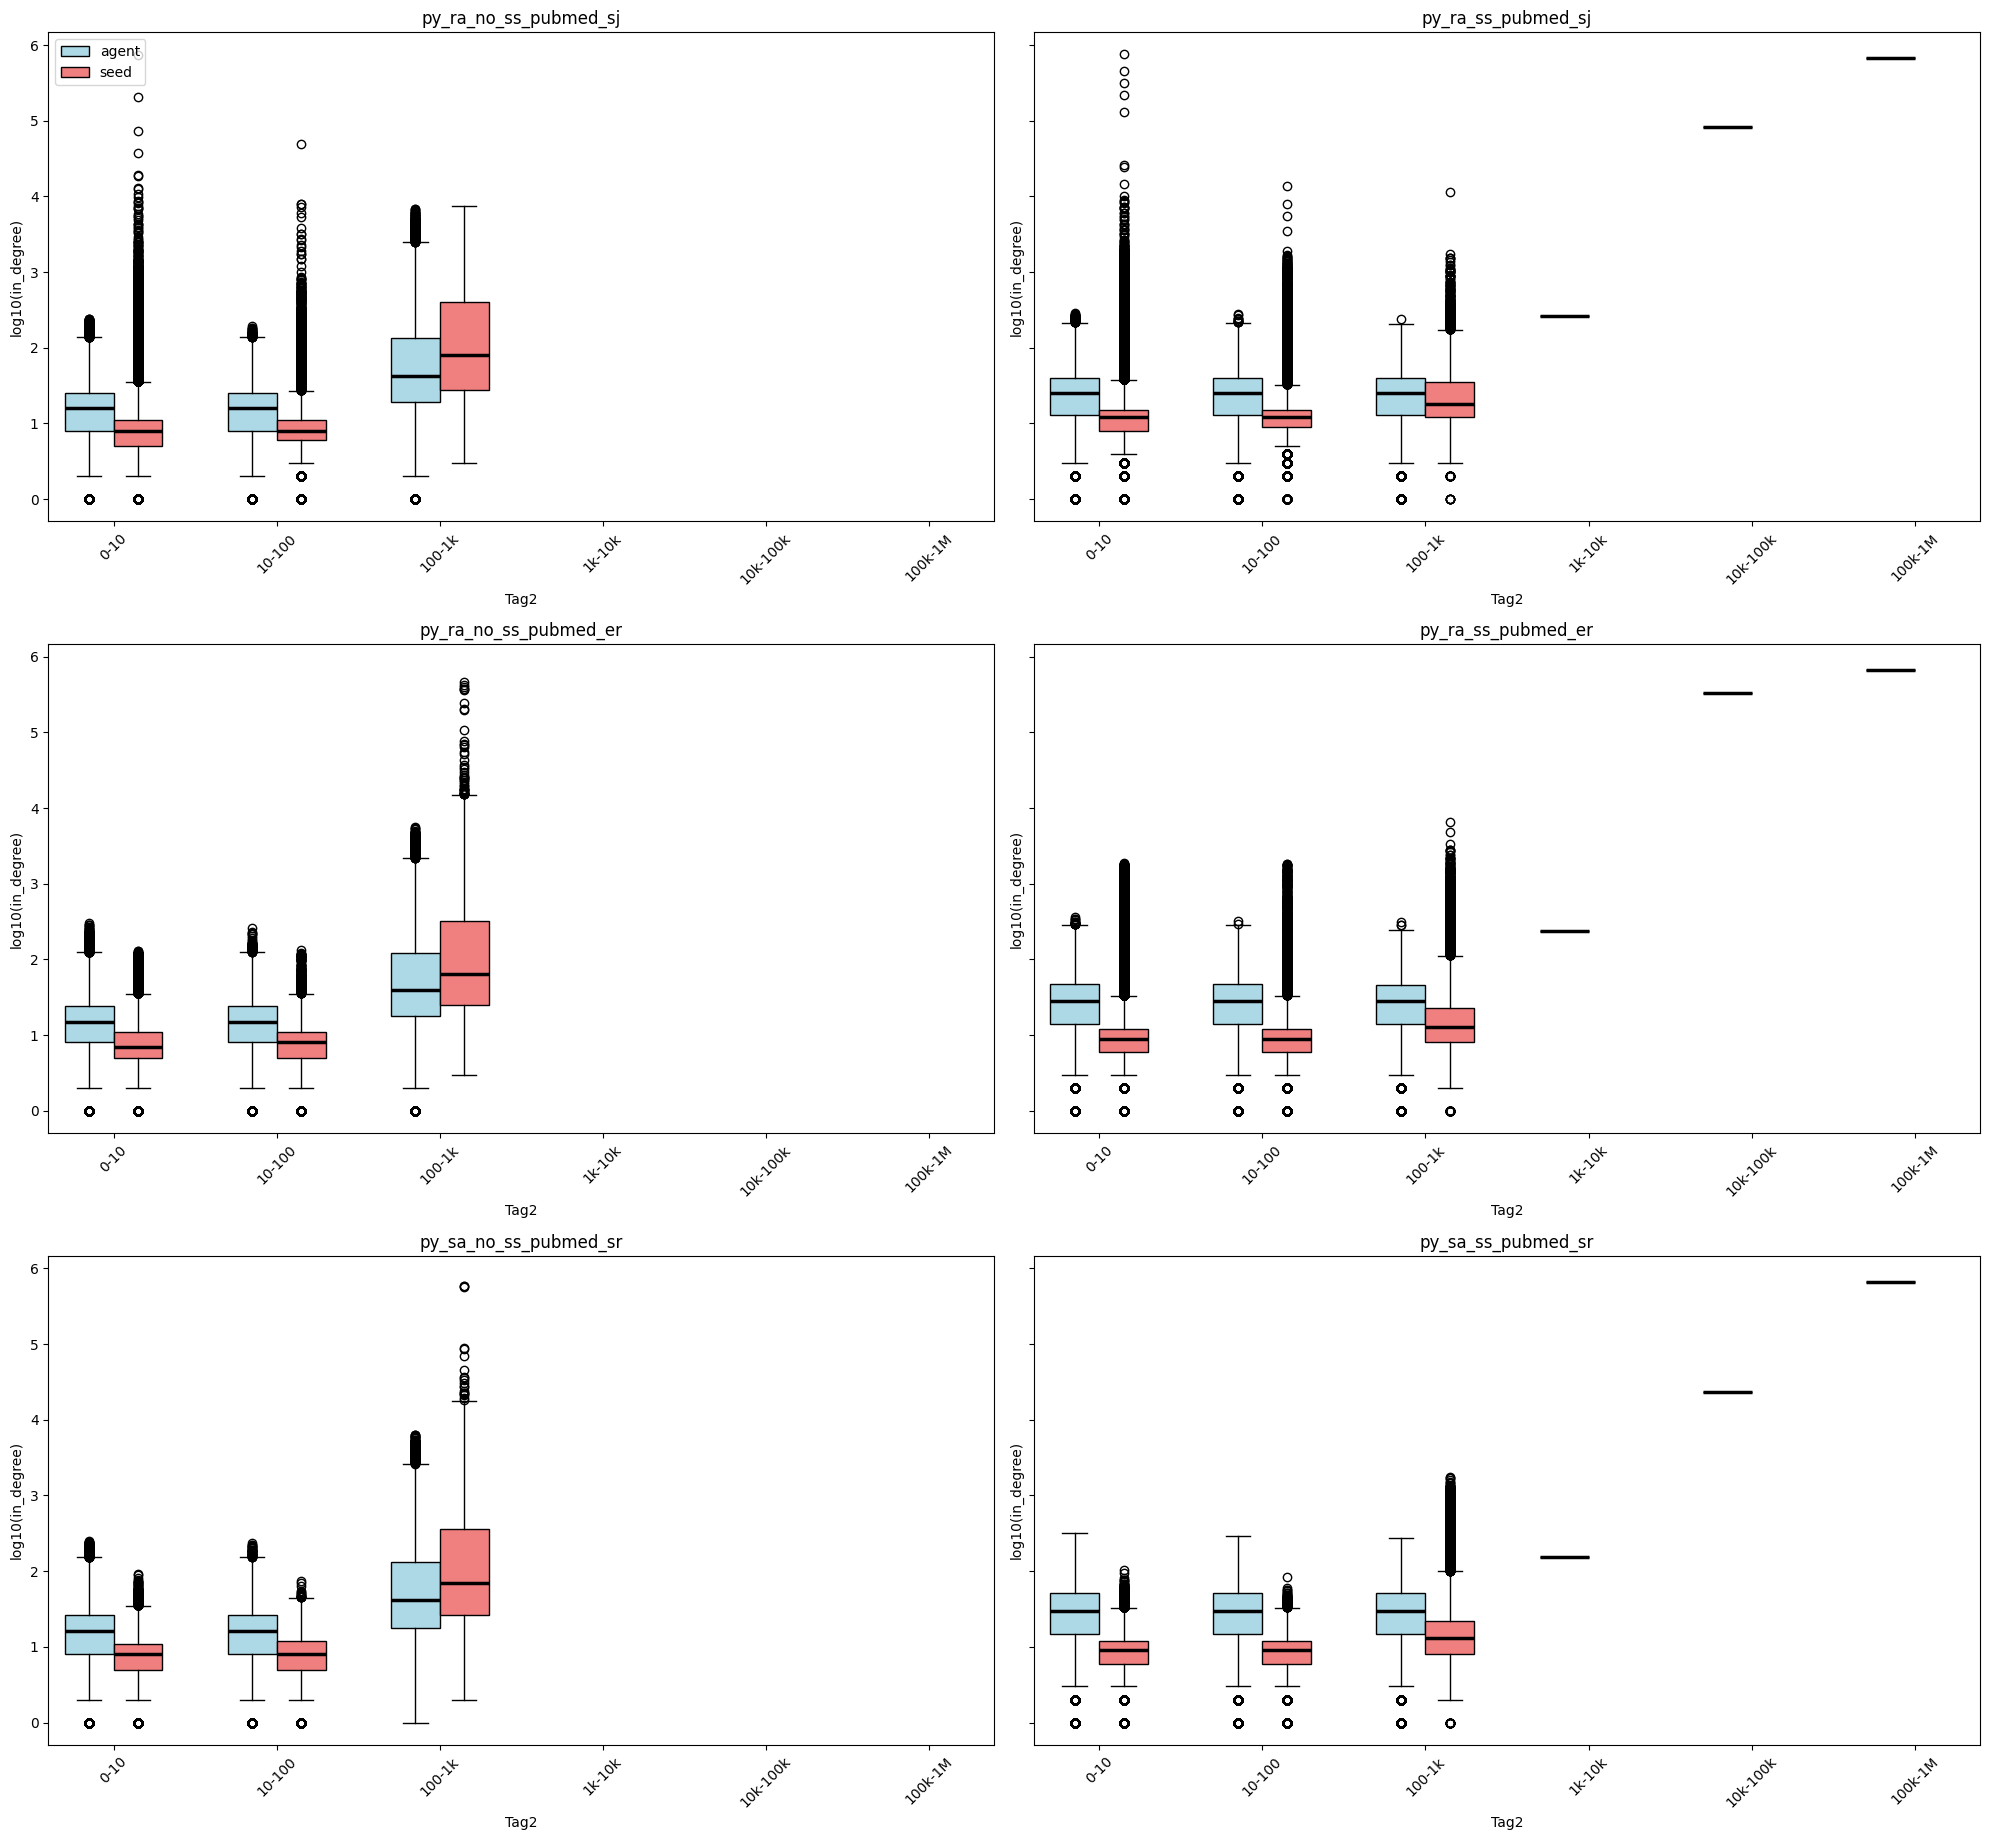

In [ ]:
#PUBMED PYTHON ALL
inputs = {
    'py_ra_no_ss_pubmed_sj': {"output":'data/experiment_metrics/py_abm/6_23_ecc7_fmf_no_ss_ra_pubmed_python_abm/output/output.aux'},
    'py_ra_ss_pubmed_sj': {"output":'data/experiment_metrics/py_abm/6_23_ecc7_fmf_ss_ra_pubmed_python_abm/output/output.aux'},
    'py_ra_no_ss_pubmed_er': {"output":'data/experiment_metrics/py_abm/6_24_ecc7_fmf_no_ss_ra_pubmed_er/output/output.aux'},
    'py_ra_ss_pubmed_er': {"output":'data/experiment_metrics/py_abm/6_24_ecc7_fmf_ss_ra_pubmed_er/output/output.aux'},
    'py_sa_no_ss_pubmed_sr': {"output":'data/experiment_metrics/py_abm/6_24_ecc7_fmf_no_ss_sa_pubmed_er/output/output.aux'},
    'py_sa_ss_pubmed_sr': {"output":'data/experiment_metrics/py_abm/6_24_ecc7_fmf_ss_sa_pubmed_er/output/output.aux'}
}
plot_multiple_experiments_grid(inputs)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_multiple_experiments_grid_fit(aux_dict: dict):
    n = len(aux_dict)
    n_cols = n
    n_rows = 1

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows), sharey=True)
    axs = axs.flatten()

    for ax, (name, dic_met) in zip(axs, aux_dict.items()):
        df = pd.read_csv(dic_met['output'])
        # metrics = pd.read_csv(dic_met['metrics'])

        df = df[df["in_degree"] > 0]

        f1 = df.query("fit_peak_value > 0 and fit_peak_value <= 10")
        f2 = df.query("fit_peak_value > 10 and fit_peak_value <= 100")
        f3 = df.query("fit_peak_value > 100 and fit_peak_value <= 1000")
        f4 = df.query("fit_peak_value > 1000 and fit_peak_value <= 10000")
        f5 = df.query("fit_peak_value > 10000 and fit_peak_value <= 100000")
        f6 = df.query("fit_peak_value > 100000 and fit_peak_value <= 1000000")

        dfs    = [f1, f2, f3, f4, f5, f6]
        labels = ['0-10', '10-100', '100-1k', '1k-10k', '10k-100k', '100k-1M']
        positions = np.arange(len(dfs)) * 2
        width     = 0.6
        medianprops = dict(color='black', linewidth=2.5)

        for i, df_part in enumerate(dfs):
            x = positions[i]
            agent_vals = df_part.loc[df_part['type']=='agent', 'in_degree']
            seed_vals  = df_part.loc[df_part['type']=='seed',  'in_degree']

            agent_vals = agent_vals[agent_vals > 0]
            seed_vals  = seed_vals[seed_vals > 0]
            agent_vals = np.log10(agent_vals)
            seed_vals  = np.log10(seed_vals)

            ax.boxplot(
                agent_vals,
                positions=[x - width/2],
                widths=width,
                notch=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightblue',  edgecolor='black'),
                medianprops=medianprops
            )

            ax.boxplot(
                seed_vals,
                positions=[x + width/2],
                widths=width,
                notch=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral', edgecolor='black'),
                medianprops=medianprops
            )
        # df_superstar = df[df['fit_peak_value']==1000000]
        # superstar_indeg = str(df_superstar['in_degree'].values[0])
        
        # ax.text(
        # 0.97, 0.05,
        # f"Superstar indeg: {superstar_indeg}",
        # transform=ax.transAxes,
        # fontsize=11,
        # fontweight='bold',
        # verticalalignment='bottom',
        # horizontalalignment='right',
        # bbox=dict(boxstyle="round,pad=0.5", facecolor="#f9f9f9", edgecolor="gray", alpha=0.9),
        # linespacing=1.3   
        # )   

        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=45)
        ax.set_xlabel('Tag2')
        ax.set_ylabel('log10(in_degree)')
        ax.set_title(name)

    for ax in axs[n:]:
        ax.remove()

    legend_elems = [
        Patch(facecolor='lightblue',  edgecolor='black', label='agent'),
        Patch(facecolor='lightcoral', edgecolor='black', label='seed')
    ]
    axs[0].legend(handles=legend_elems, loc='upper left')
    plt.tight_layout()
    plt.show()

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])


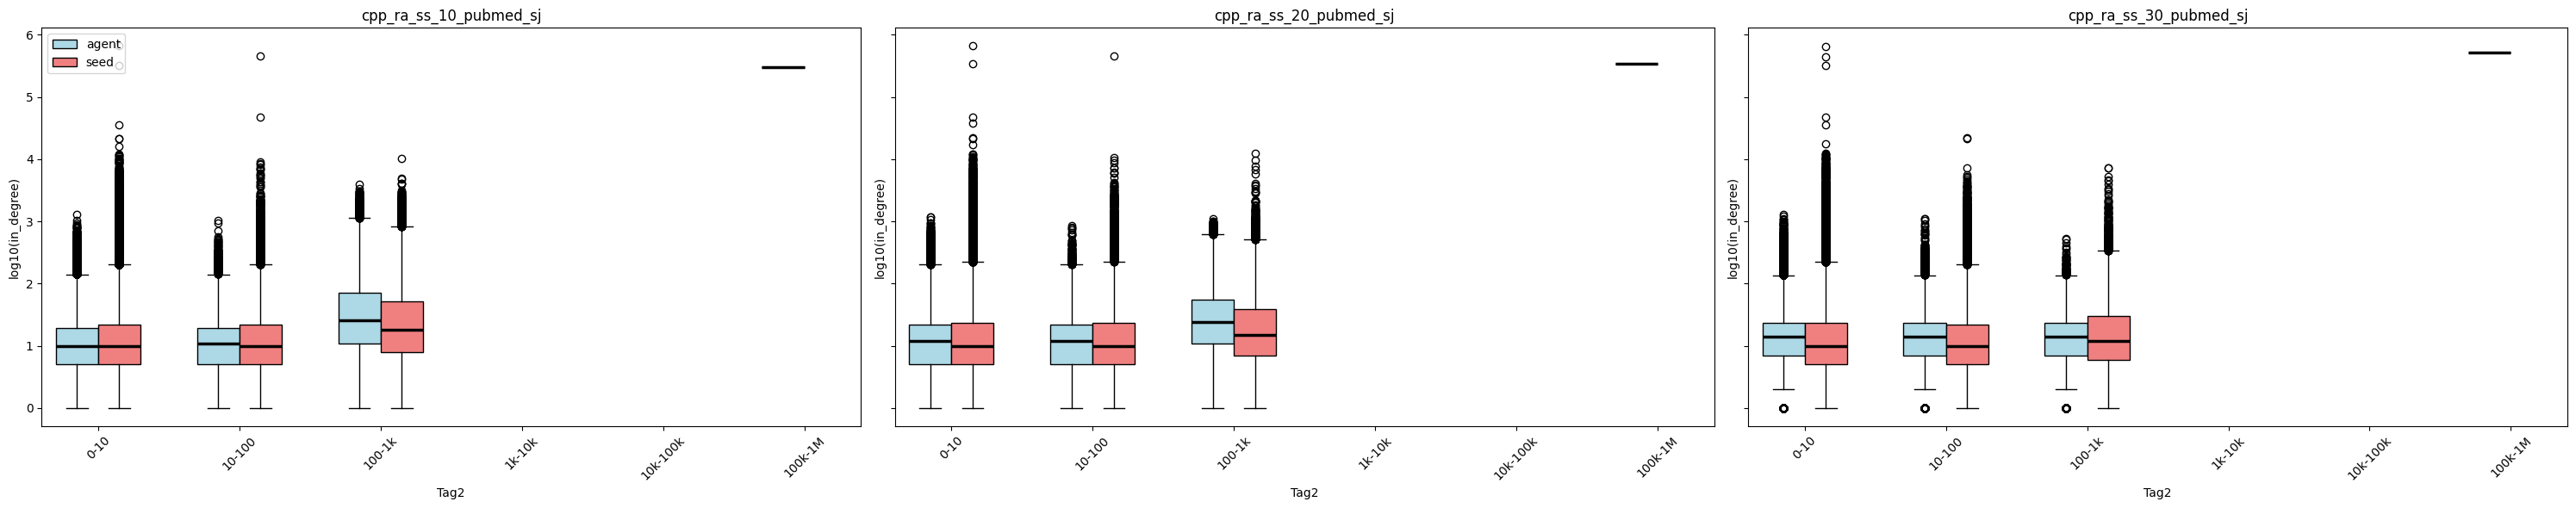

In [82]:
#FITNESS EXPERIMENT RA SS PUBMED SJ
inputs = {

    'cpp_ra_ss_10_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_10_years_of_fitness/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_10_years_of_fitness/experiment_metrics.csv'},
    'cpp_ra_ss_20_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_20_years_of_fitness/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_20_years_of_fitness/experiment_metrics.csv'},
    'cpp_ra_ss_30_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_continuous_fitness/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_continuous_fitness/experiment_metrics.csv'},
}
plot_multiple_experiments_grid_fit(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])


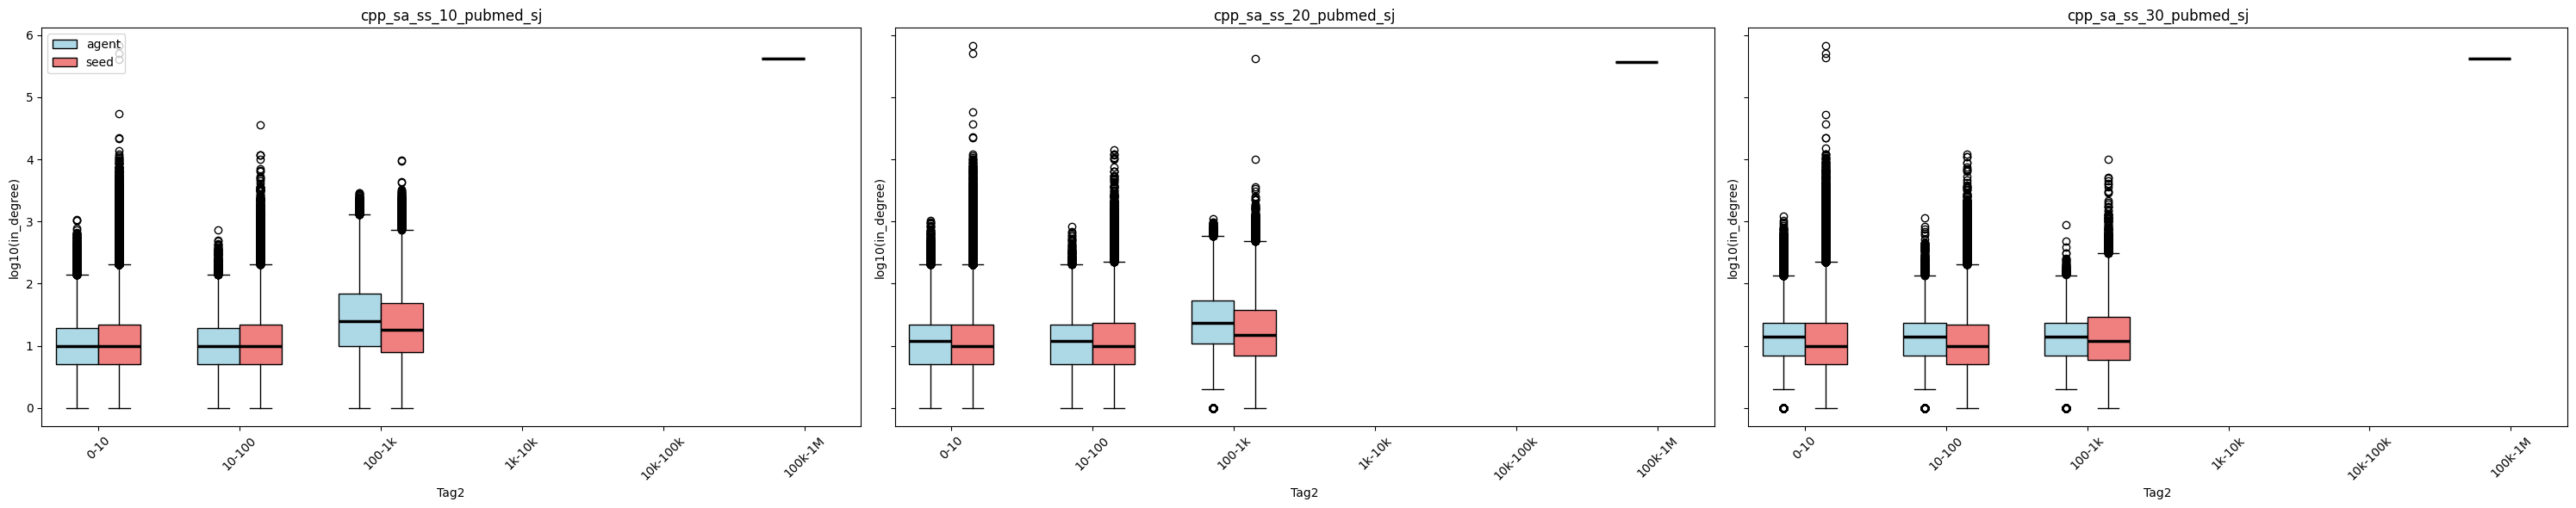

In [83]:

#FITNESS EXPERIMENT SA SS PUBMED SJ
inputs = {

    'cpp_sa_ss_10_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_19_ecc7_fmf_standard_ss_sa_10_years_of_fitness/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_19_ecc7_fmf_standard_ss_sa_10_years_of_fitness/experiment_metrics.csv'},
    'cpp_sa_ss_20_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_19_ecc7_fmf_standard_ss_sa_20_years_of_fitness/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_19_ecc7_fmf_standard_ss_sa_20_years_of_fitness/experiment_metrics.csv'},
    'cpp_sa_ss_30_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_19_ecc7_fmf_standard_ss_sa_continuous_fitness/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_19_ecc7_fmf_standard_ss_sa_continuous_fitness/experiment_metrics.csv'},
}
plot_multiple_experiments_grid_fit(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/1255584526.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dic_met['output'])


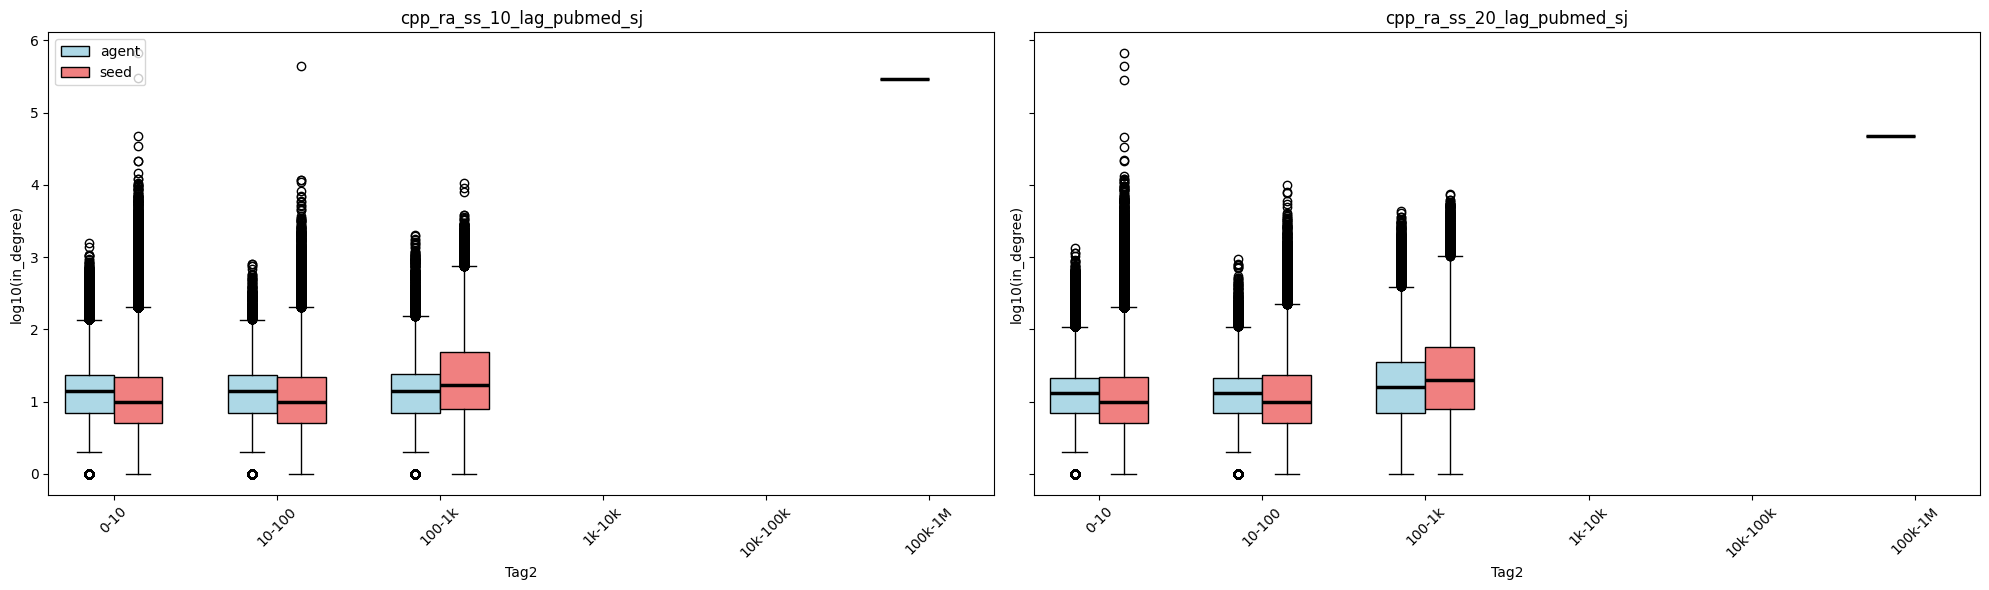

In [88]:

#FITNESS EXPERIMENT SLEEPING BEAUTY
inputs = {

    'cpp_ra_ss_10_lag_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_10_years_lag/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_10_years_lag/experiment_metrics.csv'},
    'cpp_ra_ss_20_lag_pubmed_sj': {"output":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_20_years_lag/output/output.aux', "metrics":'data/output_aux/fitness_exp/6_21_ecc7_fmf_standard_ss_ra_20_years_lag/experiment_metrics.csv'}
}
plot_multiple_experiments_grid_fit(inputs)

TypeError: string indices must be integers, not 'str'

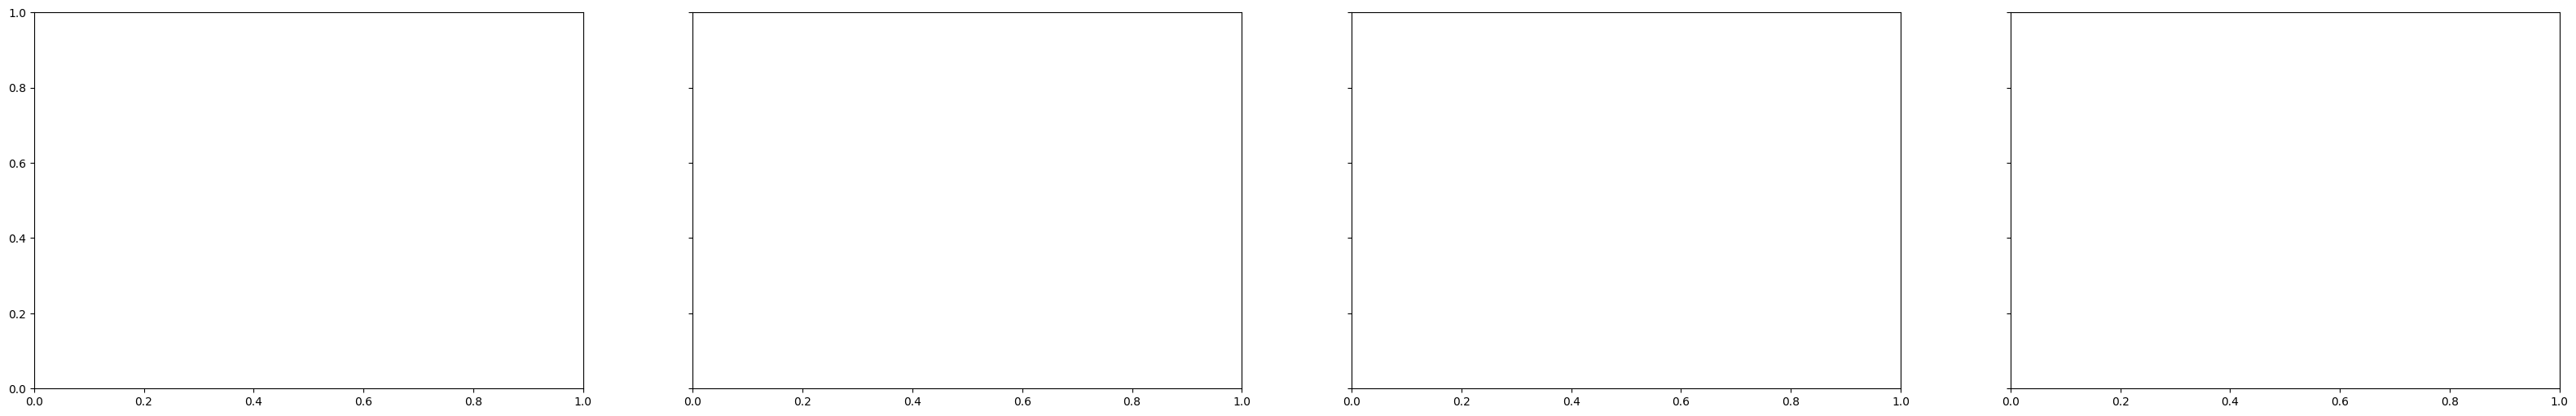

In [51]:
#ER CPP ABM
inputs = {
    'no_ss_ra_er': 'data/output_aux/cpp_abm_er/output_no_ss_ra.aux',
    'ss_ra_er': 'data/output_aux/cpp_abm_er/output_ss_ra.aux',
    'no_ss_sa_er': 'data/output_aux/cpp_abm_er/output_no_ss_sa.aux',
    'ss_sa_er': 'data/output_aux/cpp_abm_er/output_ss_sa.aux'

}
plot_multiple_experiments_grid(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/862861962.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/862861962.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/862861962.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/862861962.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


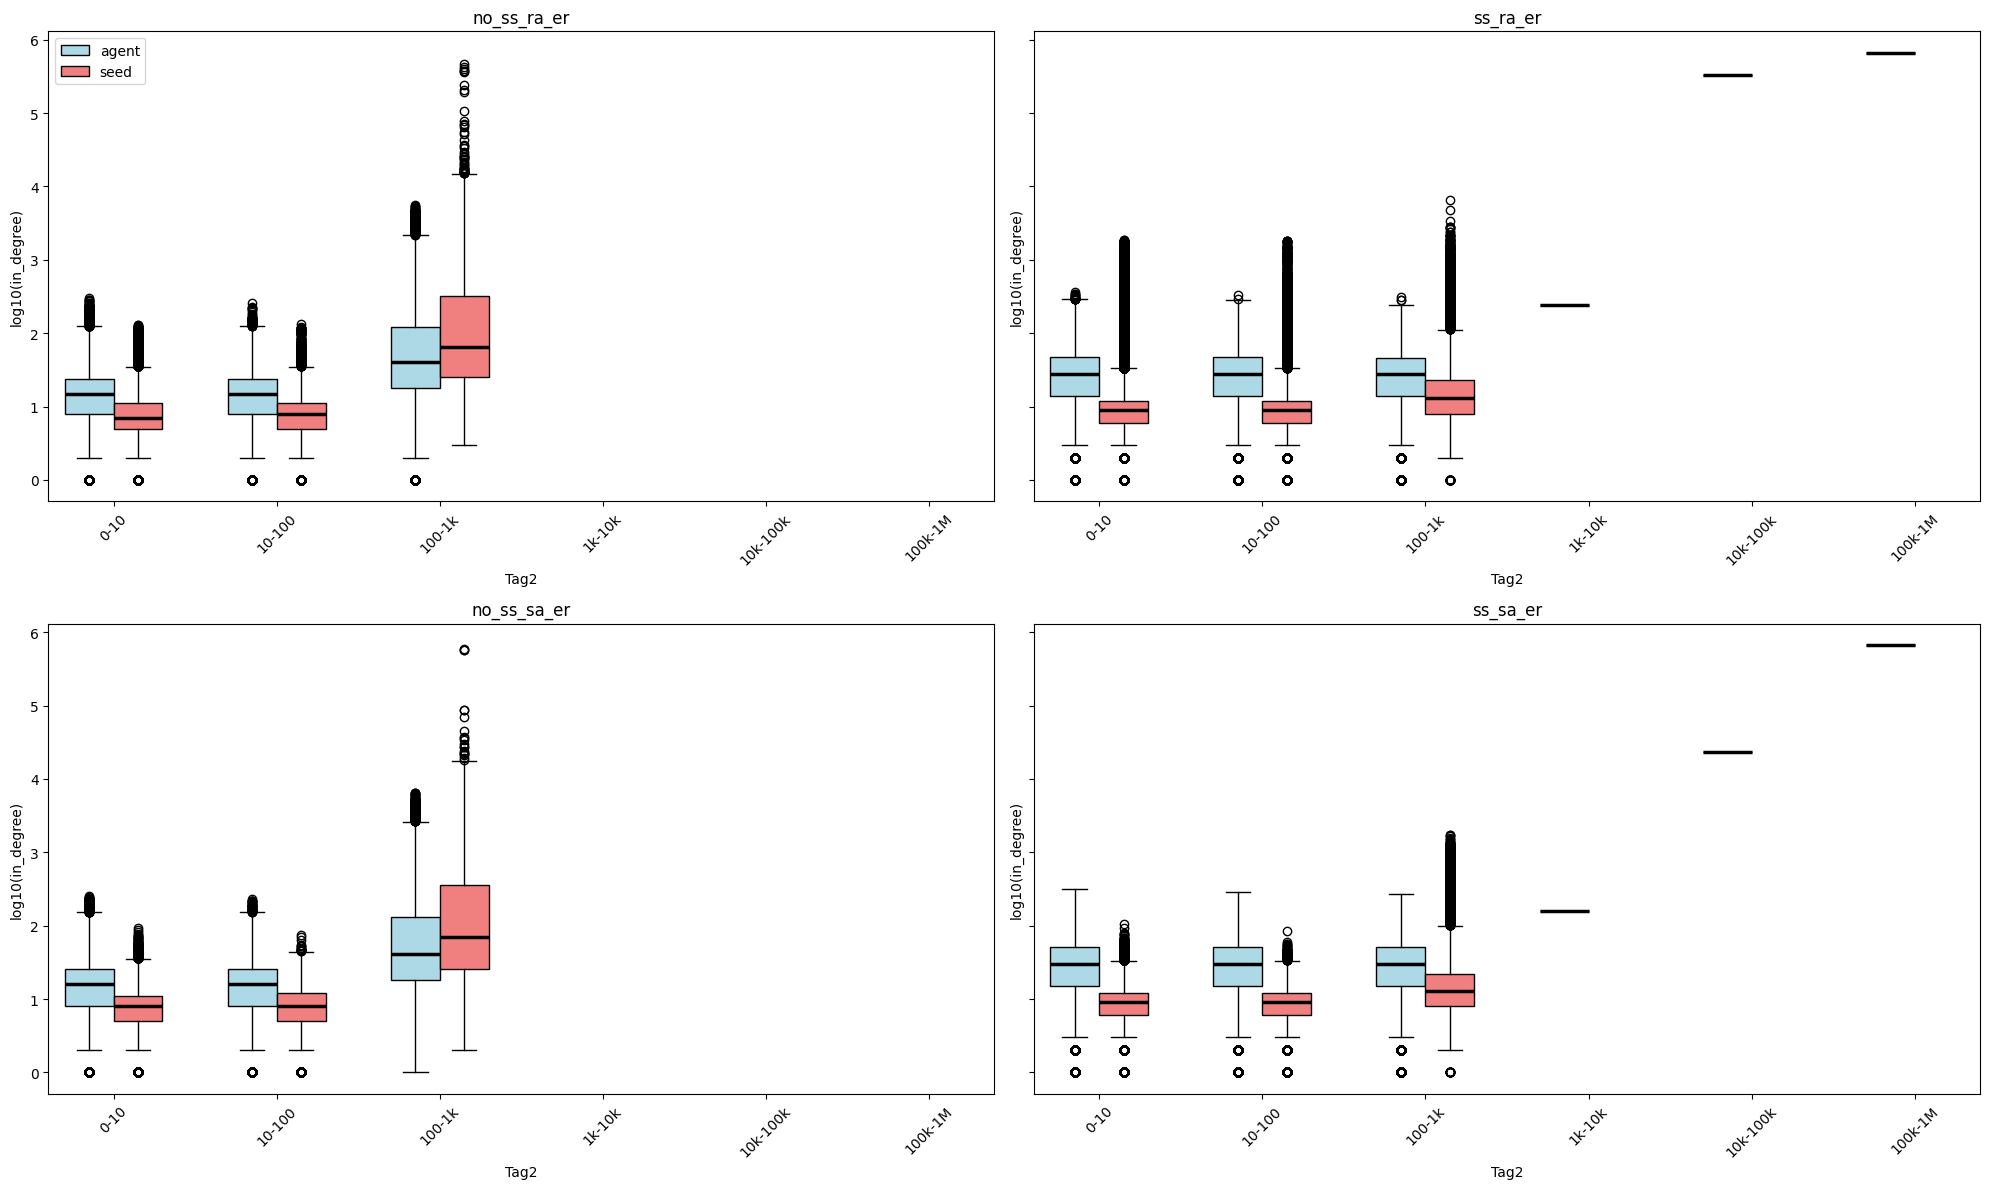

In [ ]:
#ER python
inputs = {
    'no_ss_ra_er': 'data/output_aux/py_abm/output_no_ss_ra_er_py.aux',
    'ss_ra_er': 'data/output_aux/py_abm/output_ss_ra_er_py.aux',
    'no_ss_sa_er': 'data/output_aux/py_abm/output_no_ss_sa_er_py.aux',
    'ss_sa_er': 'data/output_aux/py_abm/output_ss_sa_er_py.aux'
}
plot_multiple_experiments_grid(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/862861962.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_6476/862861962.py:15: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


ParserError: Error tokenizing data. C error: Expected 15 fields in line 847761, saw 17


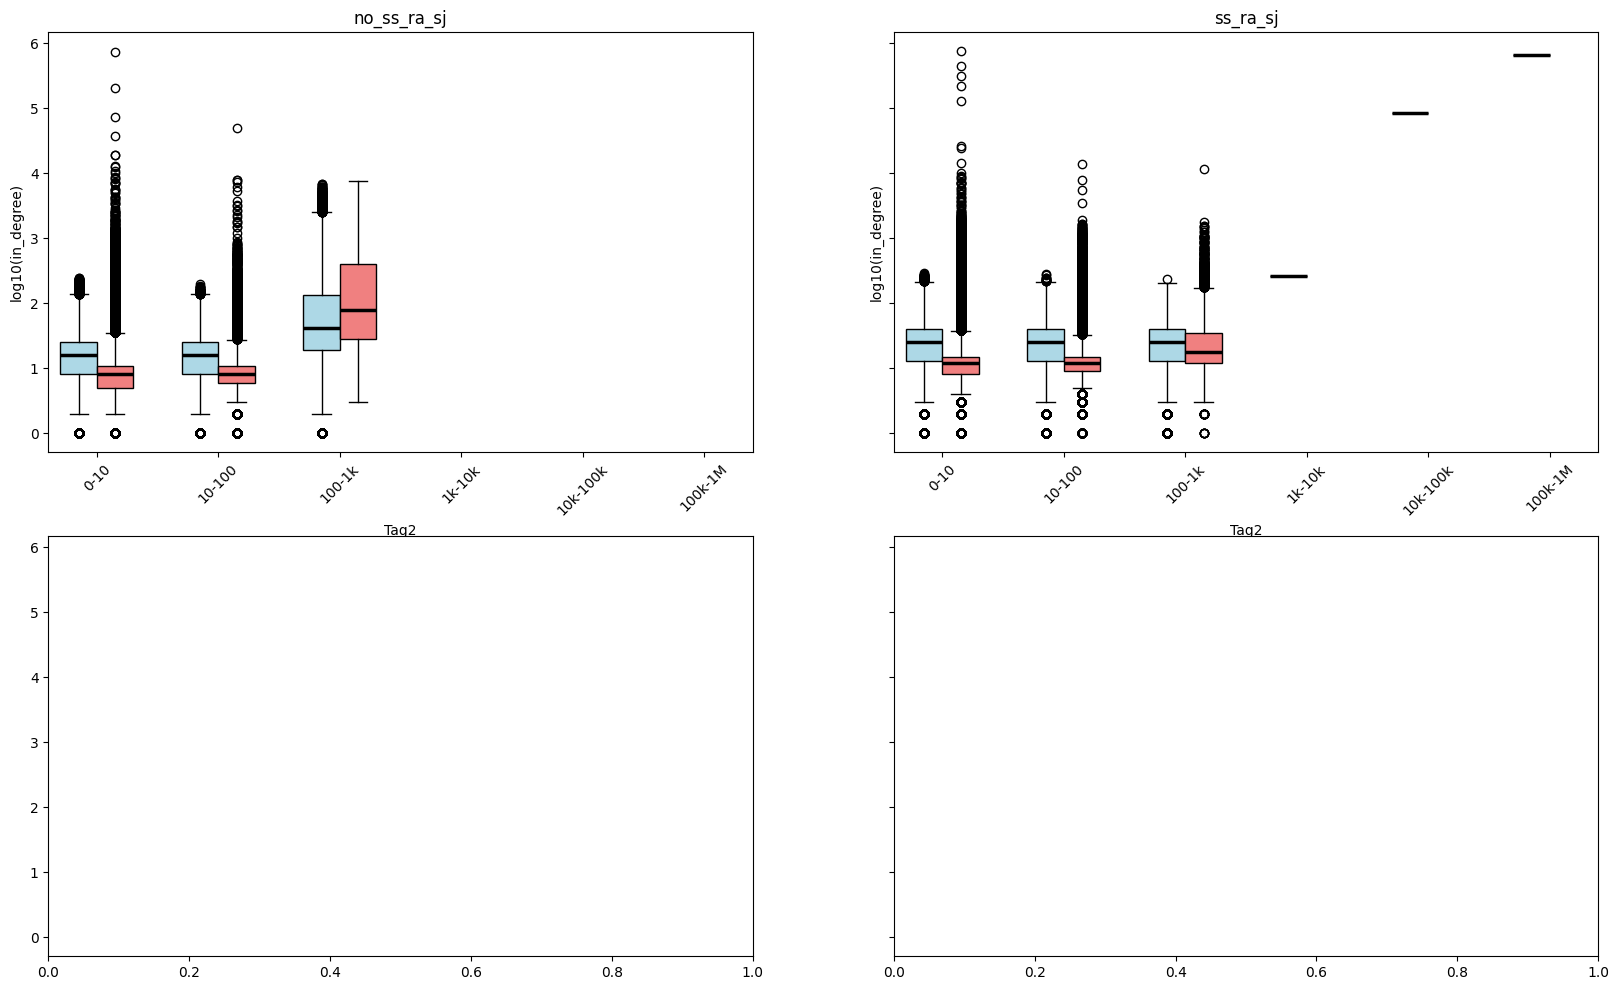

In [ ]:
#SJ python
inputs = {
    'no_ss_ra_sj': 'data/output_aux/py_abm/output_no_ss_ra_sj_py.aux',
    'ss_ra_sj': 'data/output_aux/py_abm/output_ss_ra_sj_py.aux',
    'no_ss_sa_sj': 'data/output_aux/py_abm/output_no_ss_sa_sj_py.aux',
    'ss_sa_sj': 'data/output_aux/py_abm/output_ss_sa_sj_py.aux'
}
plot_multiple_experiments_grid(inputs)